In [1]:
import numpy as np
from PIL import Image
import os, glob, random

outfile = "./seasons/photos.npz" 
max_photo = 100 
photo_size = 32 
x = [] 
y = [] 

def main():
    glob_files("./seasons/spring", 0)
    glob_files("./seasons/summer", 1)
    glob_files("./seasons/autumn", 2)
    glob_files("./seasons/winter", 3)
    np.savez(outfile, x=x, y=y)
    print("保存しました:" + outfile, len(x))

def glob_files(path, label):
    files = glob.glob(path + "/*.jpg")
    random.shuffle(files)
    
    num = 0
    for f in files:
        if num >= max_photo: break
        num += 1
        
        img = Image.open(f)
        img = img.convert("RGB") 
        img = img.resize((photo_size, photo_size)) 
        img = np.asarray(img)
        x.append(img)
        y.append(label)

if __name__ == '__main__':
    main()


保存しました:./seasons/photos.npz 400


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop

# CNNモデル
def def_model(in_shape, nb_classes):
    model = Sequential()
    model.add(Conv2D(32,
              kernel_size=(3, 3),
              activation='relu',
              input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    return model

def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model


Using TensorFlow backend.


水増し前= 320
水増し後= 7680
Train on 7680 samples, validate on 80 samples
Epoch 1/30
7680/7680 [==============================] - 17s 2ms/step - loss: 0.9321 - acc: 0.5889 - val_loss: 0.8091 - val_acc: 0.6375
Epoch 2/30
7680/7680 [==============================] - 16s 2ms/step - loss: 0.6230 - acc: 0.7458 - val_loss: 0.7539 - val_acc: 0.7000
Epoch 3/30
7680/7680 [==============================] - 17s 2ms/step - loss: 0.4859 - acc: 0.8100 - val_loss: 1.3160 - val_acc: 0.6750
Epoch 4/30
7680/7680 [==============================] - 17s 2ms/step - loss: 0.3795 - acc: 0.8557 - val_loss: 0.9574 - val_acc: 0.7375
Epoch 5/30
7680/7680 [==============================] - 17s 2ms/step - loss: 0.3040 - acc: 0.8891 - val_loss: 1.3677 - val_acc: 0.7125
Epoch 6/30
7680/7680 [==============================] - 17s 2ms/step - loss: 0.2471 - acc: 0.9056 - val_loss: 1.1638 - val_acc: 0.7500
Epoch 7/30
7680/7680 [==============================] - 17s 2ms/step - loss: 0.2156 - acc: 0.9221 - val_loss: 1.4467 - val_

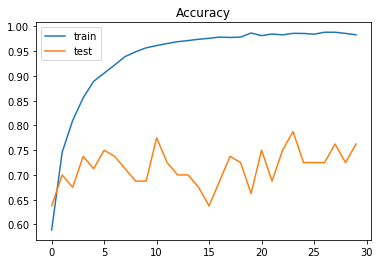

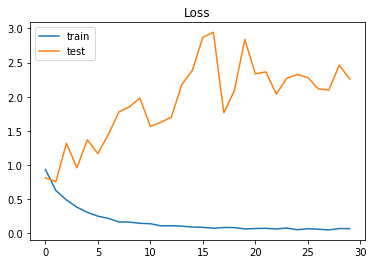

In [4]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

# 入力と出力
im_rows = 32 
im_cols = 32 
im_color = 3 
in_shape = (im_rows, im_cols, im_color)
nb_classes = 4

photos = np.load('./seasons/photos.npz')
x = photos['x']
y = photos['y']


x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255

y = keras.utils.np_utils.to_categorical(y.astype('int32'), nb_classes)


x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)


x_new = []
y_new = []
for i, xi in enumerate(x_train):
    yi = y_train[i]
    for ang in range(-30, 30, 5):
        
        center = (16, 16) 
        mtx = cv2.getRotationMatrix2D(center, ang, 1.0)
        xi2 = cv2.warpAffine(xi, mtx, (32, 32))
        x_new.append(xi2)
        y_new.append(yi)
        
        xi3 = cv2.flip(xi2, 1)
        x_new.append(xi3)
        y_new.append(yi)


print('水増し前=', len(y_train))
x_train = np.array(x_new)
y_train = np.array(y_new)
print('水増し後=', len(y_train))


model = get_model(in_shape, nb_classes)


hist = model.fit(x_train, y_train,
          batch_size=64,
          epochs=30,
          verbose=1,
          validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])


plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./seasons/photos-model.hdf5')


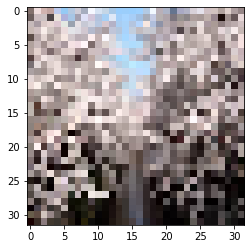

これは、 春 の写真です。
可能性は、 99 %


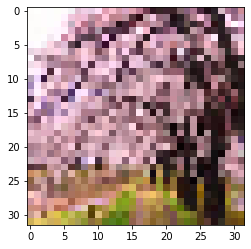

これは、 春 の写真です。
可能性は、 99 %


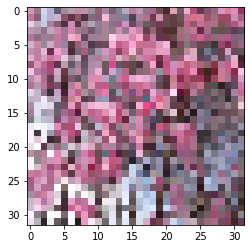

これは、 春 の写真です。
可能性は、 99 %


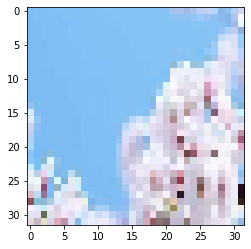

これは、 春 の写真です。
可能性は、 98 %


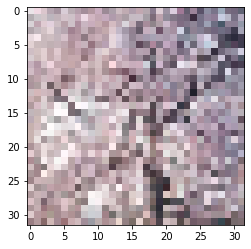

これは、 春 の写真です。
可能性は、 90 %


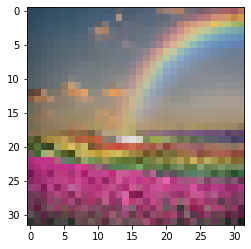

これは、 春 の写真です。
可能性は、 91 %


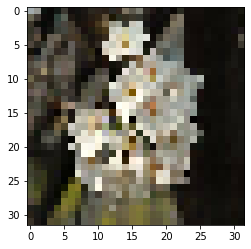

これは、 春 の写真です。
可能性は、 79 %


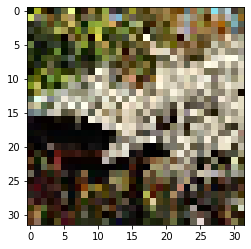

これは、 春 の写真です。
可能性は、 99 %


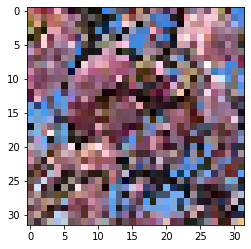

これは、 春 の写真です。
可能性は、 99 %


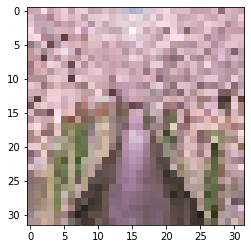

これは、 春 の写真です。
可能性は、 81 %


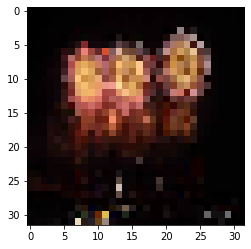

これは、 夏 の写真です。
可能性は、 100 %


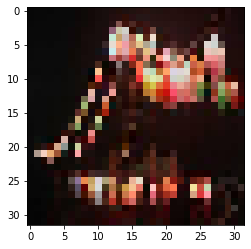

これは、 夏 の写真です。
可能性は、 100 %


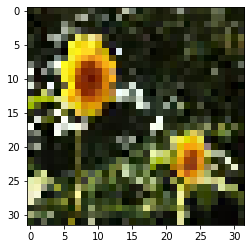

これは、 夏 の写真です。
可能性は、 99 %


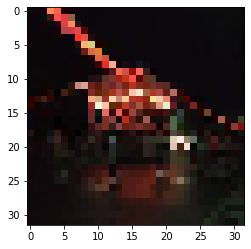

これは、 夏 の写真です。
可能性は、 100 %


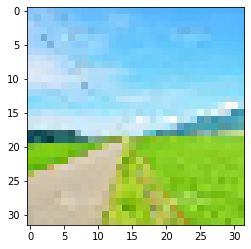

これは、 夏 の写真です。
可能性は、 100 %


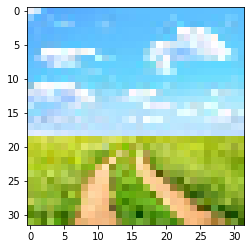

これは、 夏 の写真です。
可能性は、 99 %


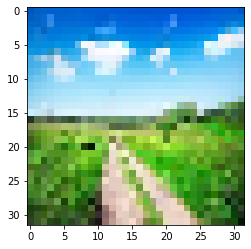

これは、 夏 の写真です。
可能性は、 100 %


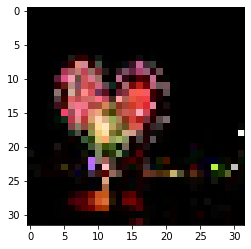

これは、 夏 の写真です。
可能性は、 100 %


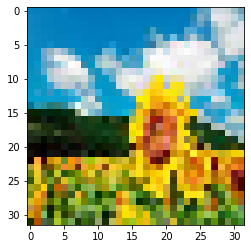

これは、 夏 の写真です。
可能性は、 100 %


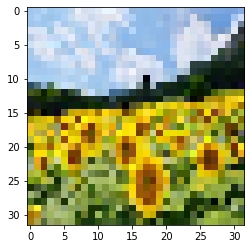

これは、 夏 の写真です。
可能性は、 100 %


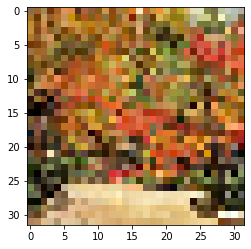

これは、 秋 の写真です。
可能性は、 100 %


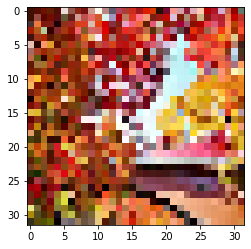

これは、 秋 の写真です。
可能性は、 100 %


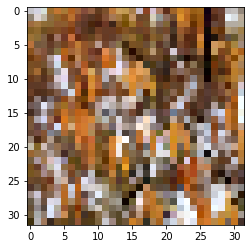

これは、 秋 の写真です。
可能性は、 100 %


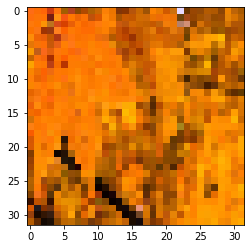

これは、 秋 の写真です。
可能性は、 100 %


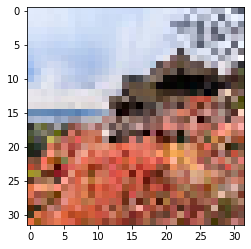

これは、 秋 の写真です。
可能性は、 99 %


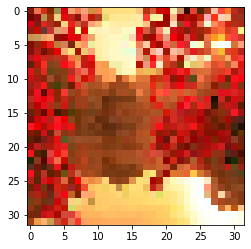

これは、 秋 の写真です。
可能性は、 100 %


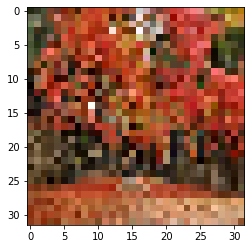

これは、 秋 の写真です。
可能性は、 100 %


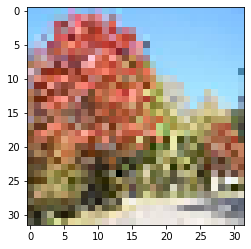

これは、 秋 の写真です。
可能性は、 100 %


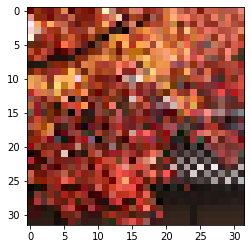

これは、 秋 の写真です。
可能性は、 99 %


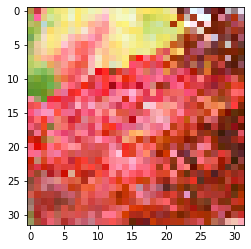

これは、 秋 の写真です。
可能性は、 100 %


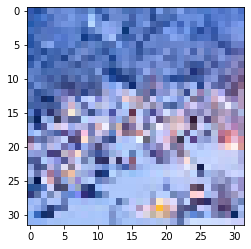

これは、 冬 の写真です。
可能性は、 99 %


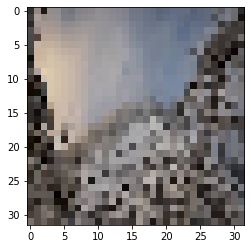

これは、 冬 の写真です。
可能性は、 98 %


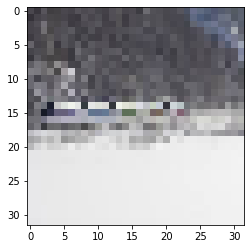

これは、 冬 の写真です。
可能性は、 100 %


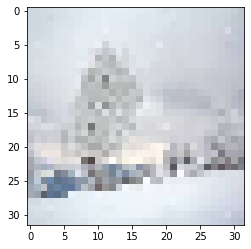

これは、 冬 の写真です。
可能性は、 100 %


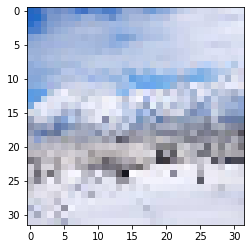

これは、 冬 の写真です。
可能性は、 99 %


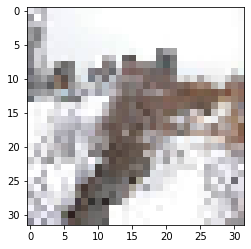

これは、 冬 の写真です。
可能性は、 99 %


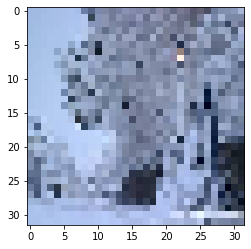

これは、 冬 の写真です。
可能性は、 99 %


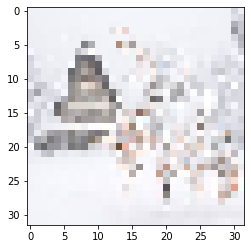

これは、 冬 の写真です。
可能性は、 99 %


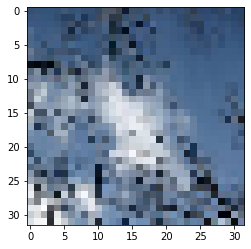

これは、 冬 の写真です。
可能性は、 99 %


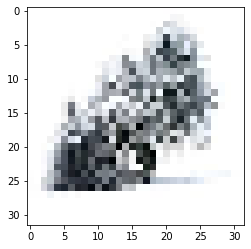

これは、 冬 の写真です。
可能性は、 100 %


In [10]:
import os 
import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


im_rows = 32 
im_cols = 32 
im_color = 3 
in_shape = (im_rows, im_cols, im_color)
nb_classes = 4

LABELS = ["春", "夏", "秋", "冬"]

model = get_model(in_shape, nb_classes)
model.load_weights('./seasons/photos-model.hdf5')

def check_photo(path):
    
    img = Image.open(path)
    img = img.convert("RGB") 
    img = img.resize((im_cols, im_rows)) 
    plt.imshow(img)
    plt.show()
    
    x = np.asarray(img)
    x = x.reshape(-1, im_rows, im_cols, im_color)
    x = x / 255

    # 予測
    pre = model.predict([x])[0]
    idx = pre.argmax()
    per = int(pre[idx] * 100)
    return (idx, per)

def check_photo_str(path):
    idx, per = check_photo(path)
    print("これは、", LABELS[idx], "の写真です。")
    print("可能性は、", per, "%")

if __name__ == '__main__':
    files = os.listdir('./seasons/images')
    images = len(files)
    for i in range(images):
        check_photo_str('./seasons/images/image_' + str(i) + '.jpg')
